# Compare simulations with different EBL

In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import setup

from pop_plot import col_size, sig_legend, history, plot_historical, redshift, eiso

import init as init

from utilities import MyLabel, single_legend

plt.style.use('seaborn-talk') # Make the labels readable
#plt.style.use('seaborn-poster') # Make the labels readable - bug with normal x marker !!!

## Define data and tags 

In [2]:
folders = [ 
    "../../../output/strictmoonveto/pop_vis24_strictmoonveto-100iter-noacc" ,
    "../../../output/toberedone/EBL/pop_vis24_strictmoonveto-100iter-noacc-franceschini",
    "../../../output/toberedone/EBL/pop_vis24_strictmoonveto-100iter-noacc-finke",
    "../../../output/toberedone/EBL/pop_vis24_strictmoonveto-100iter-noacc-builtin"
]
taglist = ["Dominguez", "Franceschini", "Finke", "Gilmore"]

## Read data - checks

In [3]:
poplist = []
for tag, f in zip(taglist, folders):
    print("\n",30*"=",tag,30*"=","\n")
    file = init.create_csv(file=None, datafile=Path(f,"data.txt"),debug=False)
    pop = init.get_data(file, debug=False)
    poplist.append(pop)
    
    # Sanity checks
    # (grb, gn0, gs0, gn, gs, gb) = pop   
    # init.sanity_check(file, grb, gn0, gs0, gn, gs, gb, debug=True, old=False)    
    
print("Done !")


 ============================== Dominguez ============================== 


 ============================== Franceschini ============================== 


 ============================== Finke ============================== 


 ============================== Gilmore ============================== 

Done !


### Loop over data and plots


In [4]:
import pandas as pd
import matplotlib.cm as cm
dump      = True
clean     = True # .txt fiels are deleted at end of notebook
det_level = 90 # INFER IT
nbin      = 20

print("Detected 5 sigma 90%CL :")
for pop, tag,  in zip(poplist, taglist):
    (grb, gn0, gs0, gn, gs, gb) = pop
    # Create full population
    fullpop = pd.concat([gn0,gs0,gb],axis=0)
    mask      = (fullpop.d5s>=det_level)

    print("   {:15s} = {:3d}".format(tag,len(fullpop[mask])))
    
    # Dump z values of detected GRBs
    if dump:
        file = open(tag+".txt","w+")
        data = fullpop[mask].z.values
#         print(data)
        file.write(str(data))
        file.close()

Detected 5 sigma 90%CL :
   Dominguez       =  81
   Franceschini    =  79
   Finke           =  77
   Gilmore         =  65


(array([ 9., 21., 15., 13., 16.,  3.,  2.,  1.,  0.,  1.]),
 array([0.13 , 0.565, 1.   , 1.435, 1.87 , 2.305, 2.74 , 3.175, 3.61 ,
        4.045, 4.48 ]),
 <BarContainer object of 10 artists>)

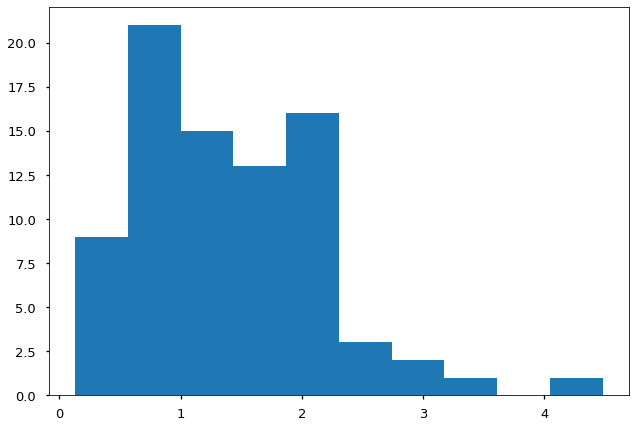

In [5]:
file = open("Dominguez.txt", "r")
content = file.read()
z = np.fromstring(content[1:-1], dtype=np.float, sep=' ')
plt.hist(z)

## Compare Redshift distributions

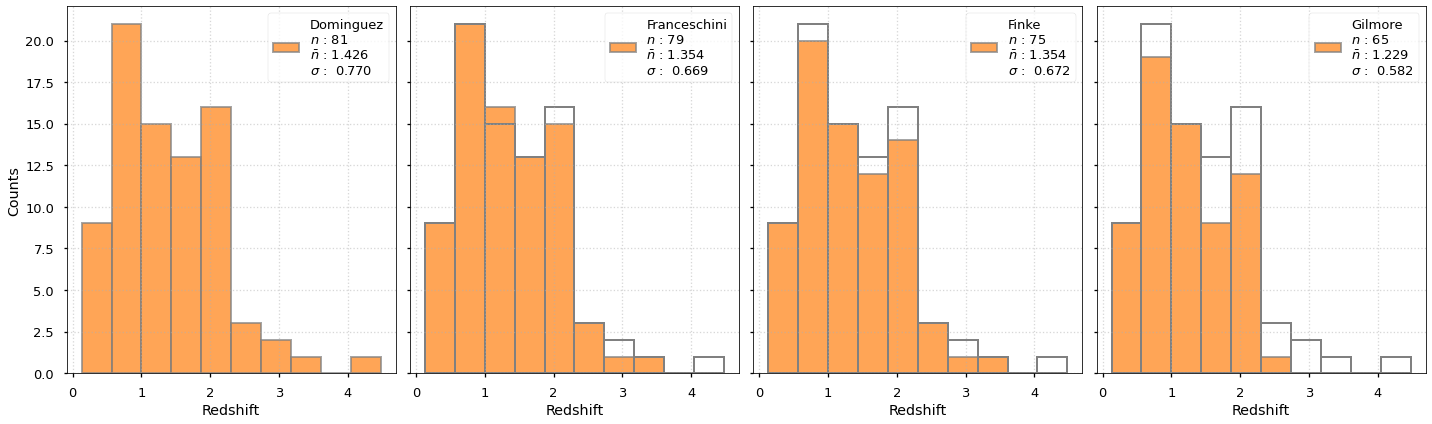

In [6]:
zmax= 5

ipop=0
first = True
bins = 10
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,6),sharey=True)

for ax1, pop, tag,  in zip(ax, poplist, taglist):
    (grb, gn0, gs0, gn, gs, gb) = pop
    fullpop = pd.concat([gn0,gs0,gb],axis=0)
 
    mask = (fullpop.d5s>det_level) & (fullpop.z<=zmax)
    plot = ax1.hist(fullpop[mask].z,bins=bins,alpha=0.7,color="tab:orange",
                edgecolor="grey",lw=2,
            label=MyLabel(fullpop[mask].z,label=tag))
    bins = plot[1]
    ax1.legend()
    ax1.set_xlabel("Redshift")
    ax1.grid(ls=":",alpha=0.5)
    if first:
        first = False
        plot1 = plot
        ax1.set_ylabel("Counts")

    else:
        n, bins, bars = plot1
        ax1.bar(bins[:-1]+0.5*(bins[1:]-bins[:-1]),
                n,
                width=(bins[1:]-bins[:-1]),
                facecolor="none",edgecolor="grey",lw=2,alpha=1)
    ipop+=1

plt.tight_layout()

## Compare Eiso distributions

[ 5.  3.  6. 11. 21. 12. 14.  5.  1.  3.]
[ 5.  3.  6. 11. 21. 12. 14.  5.  1.  3.]
[ 5.  3.  6. 11. 21. 12. 14.  5.  1.  3.]


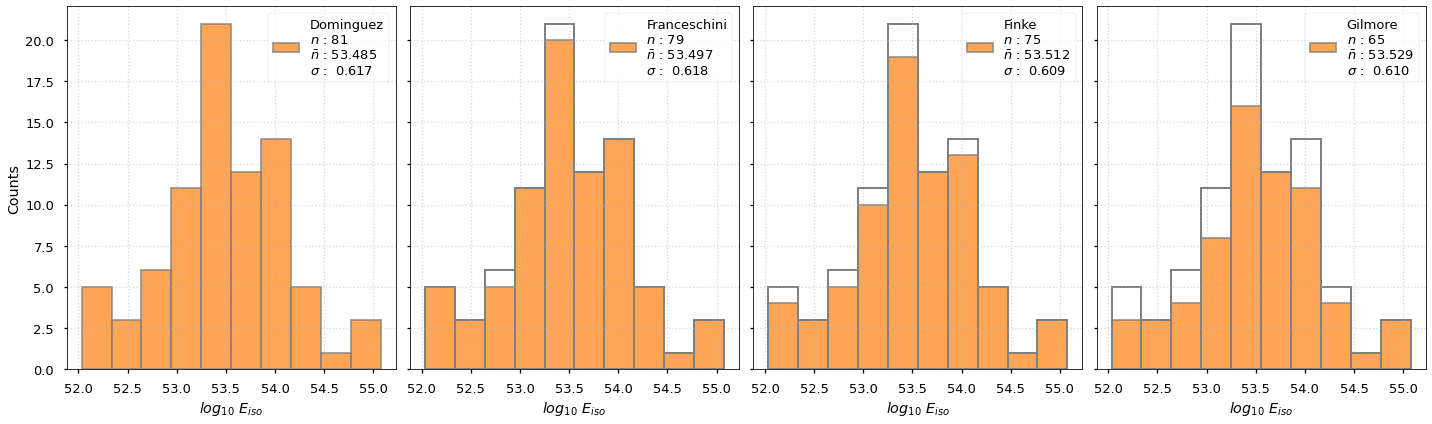

In [7]:
Eisomin = 5e50
Eisomax = 5e55

ipop=0
first = True
bins = 10
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,6),sharey=True)

for ax1, pop, tag,  in zip(ax, poplist, taglist):
    
    (grb, gn0, gs0, gn, gs, gb) = pop
    fullpop = pd.concat([gn0,gs0,gb],axis=0)
 
    mask = (fullpop.d5s>det_level)# & (fullpop.Eiso>=Eisomin) & (fullpop.Eiso<=Eisomax)
    plot = ax1.hist(np.log10(fullpop[mask].Eiso),bins=bins,
                    alpha=0.7,color="tab:orange",
                    edgecolor="grey",lw=2,
                    label=MyLabel(np.log10(fullpop[mask].Eiso),label=tag))
    bins = plot[1]

    ax1.legend()
    ax1.set_xlabel("$log_{10} \ E_{iso}$")
    ax1.grid(ls=":",alpha=0.5)
    if first:
        first = False
        plot1 = plot
        ax1.set_ylabel("Counts")

    else:
        n, bins, bars = plot1
        print(n)
        ax1.bar(bins[:-1]+0.5*(bins[1:]-bins[:-1]),
                n,
                width=(bins[1:]-bins[:-1]),
                facecolor="none",alpha=1,edgecolor="grey",lw=2,)
    ipop+=1

plt.tight_layout()

## Cleanup files

In [8]:
import os
for tag  in taglist:
    name=tag+".txt"
    print(" Removing ",name)
    os.remove(name)
print("Done")

 Removing  Dominguez.txt


PermissionError: [WinError 32] Le processus ne peut pas accéder au fichier car ce fichier est utilisé par un autre processus: 'Dominguez.txt'